In [0]:
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [0]:
import os
path = os.getcwd()
if path == '/content':
    from google.colab import drive
    drive.mount('/content/gdrive')
    BASE_PATH = '/content/gdrive/My Drive/Level-4-Project/'
    !cd gdrive/My\ Drive/Level-4-Project/ && pip install --editable .
    os.chdir('gdrive/My Drive/Level-4-Project/')
    
elif path == 'D:\\Google Drive\\Level-4-Project\\notebooks\\baseline_model':
    BASE_PATH = "D:/Google Drive/Level-4-Project/"
    
elif path == "/export/home/2192793m":
    BASE_PATH = "/export/home/2192793m/Level-4-Project/"
    
DATA_PATH = BASE_PATH + 'data/raw/'

In [0]:
# Load in file to pandas dataframe
df = pd.read_table(
    DATA_PATH + "Dataset_97.dat",
    sep="\n",
    header=None)

In [0]:
# Switches out i for j to ensure python compatibility
def convert_to_complex(complex_string):
    return abs(complex(complex_string[0].replace('i', 'j')))

In [0]:
# Grab RADAR settings from top of file
center_frequency = float(df.iloc[0])
sweep_time = float(df.iloc[1])/1000  # convert to seconds
number_of_time_samples = float(df.iloc[2])
bandwidth = float(df.iloc[3])
sampling_frequency = number_of_time_samples/sweep_time
record_length = 60
number_of_chirps = record_length/sweep_time

In [0]:
# Put data values into an array
data = df.iloc[4:]
data = data.apply(convert_to_complex, axis=1)
data = data.values

In [67]:
samples_60 = data.shape[0]
samples_3 = samples_60/(60/3)
number_to_average_for_512 = samples_3/512
print("Samples in 60s:", samples_60)
print("Samples in 3s:", samples_3)
print(number_to_average_for_512)

Samples in 60s: 7680000
Samples in 3s: 384000.0
750.0


In [68]:
temp = np.reshape(data, (-1, 20))
print(temp.shape)

(384000, 20)


In [0]:
length_of_window = 3  # 3 seconds
length_of_recording = 60
window_size = int(data.shape[0]/(length_of_recording/length_of_window))
iterations = int(data.shape[0] - window_size)
step_size = 10000
windows_3_seconds_down_sampled = []
down_sampling_factor = 512

for i in range(0, iterations, step_size):
    windows_3_seconds_down_sampled.append(np.reshape(data[i:i+window_size], (-1, down_sampling_factor)).mean(axis=0))

windows_3_seconds_down_sampled = np.array(windows_3_seconds_down_sampled)


In [129]:
print(windows_3_seconds_down_sampled.shape)
min_val = np.min(windows_3_seconds_down_sampled)
windows_3_seconds_down_sampled = windows_3_seconds_down_sampled - min_val
max_val = np.max(windows_3_seconds_down_sampled)
normalized = windows_3_seconds_down_sampled/max_val
# normalized = preprocessing.normalize(windows_3_seconds_down_sampled)
print(normalized.shape)

(730, 512)
(730, 512)


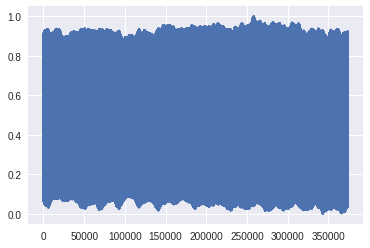

In [130]:
combined = []
for window in normalized:
    combined = combined + list(window)

plt.plot(combined)

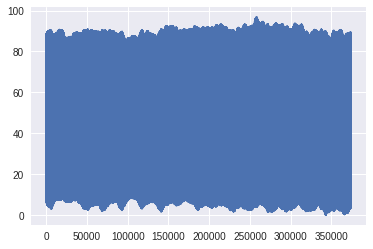

In [131]:
combined = []
for window in windows_3_seconds_down_sampled:
    combined = combined + list(window)

plt.plot(combined)

In [78]:
print(np.array(combined).shape)

(373760,)
